In [329]:
import warnings
import numpy as np
import pandas as pd
from sklearn import linear_model
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dense
from sklearn.tree import DecisionTreeRegressor
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
warnings.filterwarnings("ignore")

In [330]:
df=pd.read_csv(r"\Users\Family\Downloads\archive (2)\hou_all.csv",header=None)

In [331]:
feature_names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE',
                'DIS','RAD','TAX','PTRATIO','B','LSTAT','PRICE','v']
df.columns = feature_names  

In [332]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,v
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


CRIM: per capita crime rate by town

ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: proportion of non_retial business acres per town

CHAS: Charles River dummy variable (equal 1 if track nbounds river and 0 otherwise)

NOX: nitric oxides concetration (parts per 10 million)

RM: average number of rooms per dwelling 

AGE: proportionrtion of owner-occupied units built prior to 1940

DIS: weighted distances to five Boston employment centers

RAD: index of accessibility to radial highways

TAX: full-value property-tax rate per $10,000

PTRATIO: pupil-teacher ratio by town

B: 1000(BK - 0.63)^2 where BK is the proportion of blacks by town

LSTAT: % lower status of the population

PRICE (MEDV): Median value of owner-occupied homes in $1000's
    

In [333]:
x=df.drop(['PRICE','v'],axis=1)
y=df['PRICE']

In [334]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20)

In [335]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [336]:
model = Sequential()
model.add(Dense(128,input_dim=13,activation='relu'))
model.add(Dense(64,activation='relu'))

model.add(Dense(1,activation='linear'))

In [337]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mae'])

In [338]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 128)               1792      
                                                                 
 dense_37 (Dense)            (None, 64)                8256      
                                                                 
 dense_38 (Dense)            (None, 1)                 65        
                                                                 
Total params: 10113 (39.50 KB)
Trainable params: 10113 (39.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [339]:
history=model.fit(x_train_scaled,y_train,validation_split=0.2,epochs=100)

Epoch 1/100
11/11 [==============================] - 1s 24ms/step - loss: 568.8124 - mae: 21.9640 - val_loss: 584.6930 - val_mae: 22.1275
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 508.2328 - mae: 20.5337 - val_loss: 510.9919 - val_mae: 20.4776
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 434.2271 - mae: 18.7244 - val_loss: 412.1993 - val_mae: 18.1030
Epoch 4/100
11/11 [==============================] - 0s 5ms/step - loss: 339.1388 - mae: 16.1767 - val_loss: 286.0352 - val_mae: 14.7277
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 223.8520 - mae: 12.6836 - val_loss: 157.9115 - val_mae: 10.6437
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: 125.8167 - mae: 8.8852 - val_loss: 73.0831 - val_mae: 7.0097
Epoch 7/100
11/11 [==============================] - 0s 5ms/step - loss: 76.0942 - mae: 6.5841 - val_loss: 42.8616 - val_mae: 5.1569
Epoch 8/100
11/11 [============================

11/11 [==============================] - 0s 4ms/step - loss: 9.1960 - mae: 2.1367 - val_loss: 11.3528 - val_mae: 2.6696
Epoch 63/100
11/11 [==============================] - 0s 4ms/step - loss: 9.3099 - mae: 2.1393 - val_loss: 11.6635 - val_mae: 2.6972
Epoch 64/100
11/11 [==============================] - 0s 4ms/step - loss: 8.9800 - mae: 2.0800 - val_loss: 11.4059 - val_mae: 2.7160
Epoch 65/100
11/11 [==============================] - 0s 4ms/step - loss: 8.9196 - mae: 2.0737 - val_loss: 11.4740 - val_mae: 2.6943
Epoch 66/100
11/11 [==============================] - 0s 5ms/step - loss: 8.7942 - mae: 2.0512 - val_loss: 11.0196 - val_mae: 2.6637
Epoch 67/100
11/11 [==============================] - 0s 4ms/step - loss: 8.7157 - mae: 2.0512 - val_loss: 11.0063 - val_mae: 2.6416
Epoch 68/100
11/11 [==============================] - 0s 5ms/step - loss: 8.6654 - mae: 2.0475 - val_loss: 11.2059 - val_mae: 2.6466
Epoch 69/100
11/11 [==============================] - 0s 7ms/step - loss: 8.6095 -

In [340]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss) + 1)

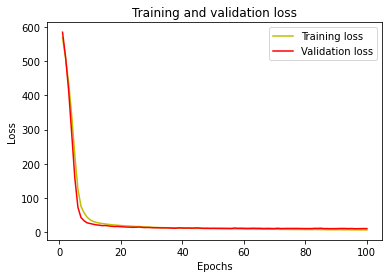

In [341]:
plt.plot(epochs,loss,'y',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [342]:
acc = history.history['mae']
val_acc = history.history['val_mae']

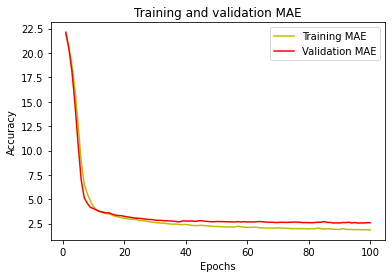

In [343]:
plt.plot(epochs,acc,'y',label='Training MAE')
plt.plot(epochs,val_acc,'r',label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [344]:
predictions = model.predict(x_train_scaled[:5])
print("Predicted values are: ",predictions)
print("real values are: ",y_train[:5])

1/1 [==============================] - 0s 99ms/step
Predicted values are:  [[20.648058]
 [43.97963 ]
 [27.44441 ]
 [14.200185]
 [14.624659]]
real values are:  7      27.1
268    43.5
80     28.0
30     12.7
450    13.4
Name: PRICE, dtype: float64


In [345]:
np.random.seed(0)

In [346]:
mse_neural, mae_neural = model.evaluate(x_test_scaled,y_test)
print('Mean squared error from neural net: ',mse_neural)
print('Mean absolute error from neural net: ',mae_neural)

4/4 [==============================] - 0s 2ms/step - loss: 14.3914 - mae: 2.8318
Mean squared error from neural net:  14.39144229888916
Mean absolute error from neural net:  2.8318116664886475


In [347]:
lr_model=linear_model.LinearRegression()
lr_model.fit(x_train_scaled,y_train)
y_pred_lr=lr_model.predict(x_test_scaled)
mse_lr = mean_squared_error(y_test,y_pred_lr)
mae_lr=mean_absolute_error(y_test,y_pred_lr)
print('Mean squared error from linear regression: ',mse_lr)
print('Mean absolute error from linear regression: ',mae_lr)

Mean squared error from linear regression:  16.495351975931676
Mean absolute error from linear regression:  3.0558941538909585


In [348]:
tree=DecisionTreeRegressor(random_state=42,max_depth=5,min_samples_leaf=4)
tree.fit(x_train_scaled,y_train)
y_pred_tree=tree.predict(x_test_scaled)
mse_dt = mean_squared_error(y_test,y_pred_tree)
mae_dt=mean_absolute_error(y_test,y_pred_tree)
print('Mean squared error from decision tree: ',mse_dt)
print('Mean absolute error from decision tree: ',mae_dt)

Mean squared error from decision tree:  14.889750121851376
Mean absolute error from decision tree:  2.6757789924230377


In [349]:
model=RandomForestRegressor(n_estimators=30,random_state=30)
model.fit(x_train_scaled,y_train)
y_pred_RF=model.predict(x_test_scaled)
mse_RF = mean_squared_error(y_test,y_pred_RF)
mae_RF=mean_absolute_error(y_test,y_pred_RF)
print('Mean squared error from random forest: ',mse_RF)
print('Mean absolute error from random forest: ',mae_RF)

Mean squared error from random forest:  12.701104793028327
Mean absolute error from random forest:  2.408235294117647


In [350]:
feature_list = list(x.columns)
feature_imp=pd.Series(model.feature_importances_,index=feature_list).sort_values(ascending=False)
feature_imp

LSTAT      0.478879
RM         0.338097
DIS        0.063072
CRIM       0.038339
NOX        0.019377
PTRATIO    0.014499
B          0.013671
TAX        0.013144
AGE        0.010595
INDUS      0.004749
RAD        0.003753
ZN         0.001460
CHAS       0.000364
dtype: float64